**利用geopandas进行矢量数据快速读、写、及可视化.**
官方网址：https://geopandas.org/en/stable/#   
geopandas是用来处理地理空间数据的python第三方库，它是在pandas的基础上建立的，融合了pandas的数据类型，并且提供了操作地理空间数据的高级接口，使得在python中进行GIS操作变成可能。


In [ ]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:
path_kunming = 'data/section-6/kunming_districts.gpkg'


1. 读入矢量数据

In [ ]:
kunming_gdf = gpd.read_file(path_kunming)
# print(kunming_gdf.crs)
# print(kunming_gdf.bounds)
# print(kunming_gdf.total_bounds)
# kunming_gdf.head(2)


shapely.geometry.multipolygon.MultiPolygon

In [52]:
### 查看编辑属性信息
kunming_gdf['new'] = [i for i in range(len(kunming_gdf))]
kunming_gdf = kunming_gdf.drop('new', axis=1)
kunming_gdf.head(2)

,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry
0,530102,五华区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71 25.137, 102.72 25.137, ..."
1,530103,盘龙区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.72 25.045, 102.72 25.045, ..."


2. 可视化矢量几何信息

Text(0.5, 1.0, 'chenggong')

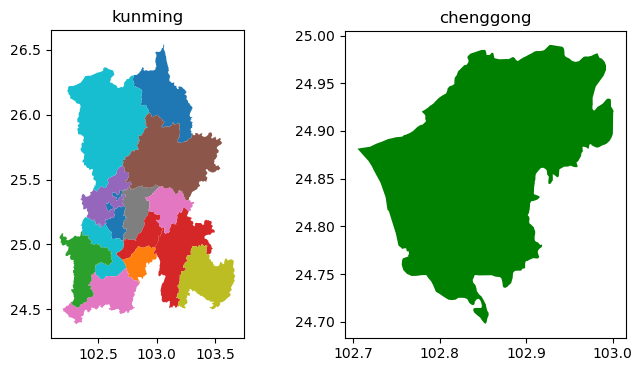

In [20]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
### 昆明区域
kunming_gdf.plot(ax=ax[0], column='dt_name')
ax[0].set_title('kunming')
### 呈贡区域
id_chenggong = np.where(kunming_gdf['dt_name'] == '呈贡区')[0]
kunming_chenggong_gdf = kunming_gdf.iloc[id_chenggong]
kunming_chenggong_gdf.plot(ax=ax[1], color='green')
ax[1].set_title('chenggong')


3. 重投影

EPSG:32648


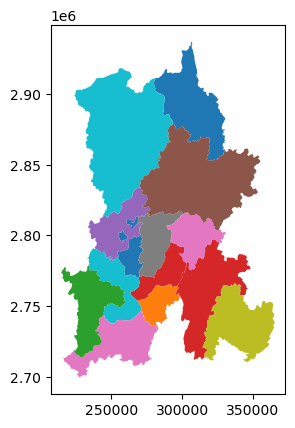

In [21]:
kunming_gdf_utm48 = kunming_gdf.to_crs(32648)
print(kunming_gdf_utm48.crs)
kunming_gdf_utm48.plot(column='dt_name');


4. 矢量数据裁剪

<Axes: >

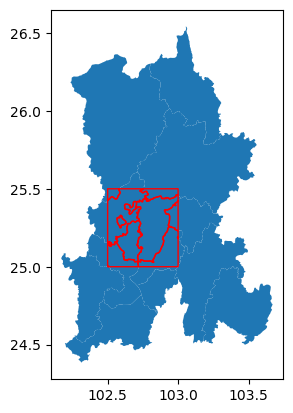

In [25]:
## 1. 定义裁剪区域geopandas对象
dict = {'name': ['region1'], 
        'geometry': [Polygon([(102.5, 25), (102.5, 25.5), 
                              (103, 25.5), (103, 25)])]}
region_gdf = gpd.GeoDataFrame(dict, crs="EPSG:4326")
region_clip = kunming_gdf.clip(region_gdf)
region_clip
ax = kunming_gdf.plot()
region_clip.plot(ax=ax, facecolor='none', edgecolor='red')


5. 矢量数据合并

<Axes: >

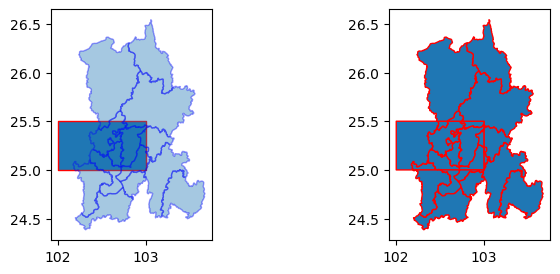

In [43]:
fig, ax = plt.subplots(1,2,figsize=(8,3))
dict = {'name': ['region1'], 
        'geometry': [Polygon([(102,25), (102,25.5), 
                              (103, 25.5), (103, 25)])]}
region_gdf = gpd.GeoDataFrame(dict, crs="EPSG:4326")
region_gdf.plot(ax=ax[0], edgecolor='red')
kunming_gdf.plot(ax=ax[0], edgecolor='blue', alpha=0.4)
region_union = kunming_gdf.overlay(region_gdf, how='union')
region_union.plot(ax=ax[1], edgecolor='red')


**6. 写出矢量文件**   
6.1. 写出只含有特定字段(name)的矢量文件

In [54]:
path_kunming_out_1 = 'data/section-6/vector_out_1.gpkg'
kunming_out_1 = kunming_gdf[['dt_name', 'geometry']]
kunming_out_1.head()


,dt_name,geometry
0,五华区,"MULTIPOLYGON (((102.71 25.137, 102.72 25.137, ..."
1,盘龙区,"MULTIPOLYGON (((102.72 25.045, 102.72 25.045, ..."
2,官渡区,"MULTIPOLYGON (((102.72 25.033, 102.72 25.033, ..."
3,西山区,"MULTIPOLYGON (((102.51 24.86, 102.51 24.86, 10..."
4,东川区,"MULTIPOLYGON (((102.8 26.303, 102.81 26.303, 1..."


In [55]:
kunming_out_1.to_file(path_kunming_out_1)


5.2 写出只含有特定特征（呈贡区）矢量文件


In [56]:
path_kunming_out_2 = 'data/section-6/vector_out_2.gpkg'
kunming_out_2 = kunming_gdf.iloc[id_chenggong]
kunming_out_2

,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry
5,530114,呈贡区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.85 24.698, 102.85 24.698, ..."


In [57]:
kunming_out_2.to_file(path_kunming_out_2)
